In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
import cv2
import random

In [11]:
def readTrafficSigns(rootpath, IMG_SIZE):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training' and image size
    Returns:   trainingdata'''
    training_data = []

    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        k = 0
        # loop over all images in current annotations file
        for row in gtReader:
            if k == 0:
                pass
            else:
                training_data.append([cv2.resize(plt.imread(prefix + row[0]), (IMG_SIZE,IMG_SIZE)),int(row[7])])
            k += 1
        gtFile.close()
    return training_data

In [13]:
IMG_SIZE = 50
training_data = readTrafficSigns('GTSRB/Final_Training/Images', IMG_SIZE)
random.shuffle(training_data)

In [28]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.reshape(X, (-1, IMG_SIZE, IMG_SIZE, 3))


(39209, 50, 50, 3)


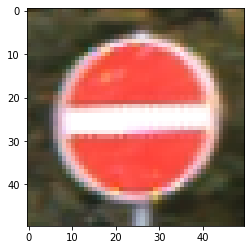

In [29]:
print(X.shape)
plt.imshow(X[9])

In [30]:
def label_trafo(labels, num_labels):
    new_labels = []
    for label in labels:
        tmp = np.zeros((num_labels))
        tmp[int(label)] = 1
        new_labels.append(tmp)
    return new_labels

In [33]:

Y = label_trafo(y, 43)
print(Y[0:100])
print(y[0:100])

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0